<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week9/RegressionModel_SVM_M_Rakan_Bagus_11103213162.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Model - SVM Regression


In [2]:
# Import library untuk menghubungkan Google Drive
from google.colab import drive

# Menghubungkan Google Drive
drive.mount('/content/drive')

# Path ke dataset di Google Drive
dataset_path = '/content/drive/MyDrive/Machine Learning/Dataset/CreditDataset.csv'  # Ganti dengan path dataset Anda


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Membaca Dataset

In [3]:
# Import library untuk membaca data
import pandas as pd

# Membaca dataset
data = pd.read_csv(dataset_path)

# Menampilkan 5 baris pertama
print(data.head())

# Informasi dasar tentang dataset
print(data.info())
print(data.describe())


    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 

#Preprocessing Data

In [7]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Membaca dataset
data = pd.read_csv(dataset_path)

# Memisahkan fitur dan target
X = data.drop(columns=['Class'])  # Ganti 'Class' dengan nama kolom target
y = data['Class']

# Identifikasi kolom non-numerik
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Mengonversi kolom non-numerik menjadi numerik
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Mengisi nilai yang hilang dengan rata-rata
X.fillna(X.mean(), inplace=True)

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Membuat Model Regresi SVM

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Membuat model SVM
svm_regressor = SVR(kernel='rbf')

# Melatih model
svm_regressor.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = svm_regressor.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.15492406296958738
R² Score: 0.2550832409203636


#Evaluasi Model

Akurasi: 0.8
Presisi: 0.8176100628930818
Recall: 0.9219858156028369
F1 Score: 0.8666666666666667
AUC: 0.8005769924269743


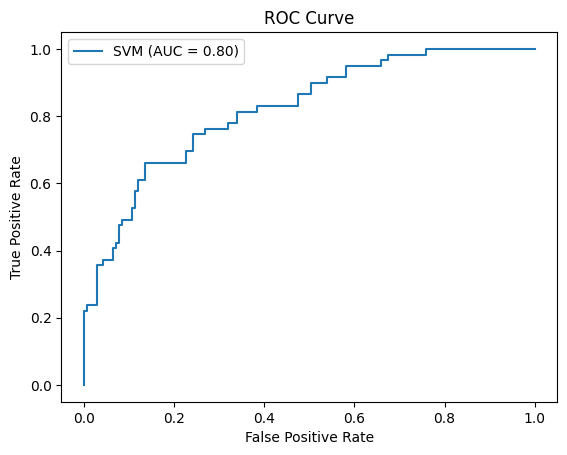

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Menggunakan prediksi probabilitas (jika diperlukan)
# y_prob = svm_regressor.decision_function(X_test)

# Contoh evaluasi untuk klasifikasi
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
auc = roc_auc_score(y_test, y_pred)

# Menampilkan hasil
print(f"Akurasi: {accuracy}")
print(f"Presisi: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=2)
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Grid Search
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluasi ulang
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report (Best Model):
              precision    recall  f1-score   support

           1       0.81      0.90      0.85       141
           2       0.67      0.49      0.57        59

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200

